In [1]:
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
%matplotlib widget

In [4]:
ds_disk = xr.open_dataset("data/btsettl_full.nc")

In [5]:
ds_disk

<xarray.Dataset> Size: 2GB
Dimensions:     (wavelength: 1106968, par1: 38, par2: 7)
Coordinates:
  * wavelength  (wavelength) float64 9MB 0.5 0.5 0.5 0.5 ... 30.0 30.0 30.0 30.0
  * par1        (par1) int64 304B 1200 1300 1400 1500 ... 4600 4700 4800 4900
  * par2        (par2) float64 56B 2.5 3.0 3.5 4.0 4.5 5.0 5.5
Data variables:
    grid        (wavelength, par1, par2) float64 2GB ...
Attributes:
    key:      ['par1', 'par2']
    par:      ['teff', 'logg']
    title:    ['Teff', 'log(g)']
    unit:     ['(K)', '(dex)']
    res:      [ 99999.99999934 100000.99999934 100002.00000157 ... 149998.000...

In [6]:
arr_teff = ds_disk.coords['par1']
arr_logg = ds_disk.coords['par2']
arr_wave = ds_disk.coords["wavelength"]

num_teff = len(arr_teff)
num_logg = len(arr_logg)
num_wave = len(arr_wave)

print(num_teff)
print(num_logg)
print(num_wave)

38
7
1106968


In [7]:
flux_grid = ds_disk.data_vars["grid"]
np.shape(flux_grid)

(1106968, 38, 7)

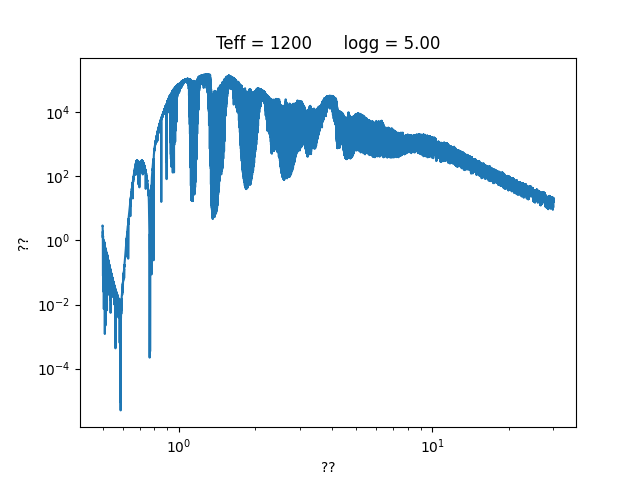

In [10]:
plt.close("all")
fig,ax = plt.subplots()

i = 0
j = 5

teff = arr_teff[i]
logg = arr_logg[j]
wl = np.array(arr_wave)
fl = np.array(flux_grid[:,i,j])

ax.set_title("Teff = %d      logg = %.2f"%(teff, logg))
ax.plot(wl,fl)

ax.set(xscale="log", yscale="log")
ax.set(xlabel="??", ylabel="??")

plt.show()

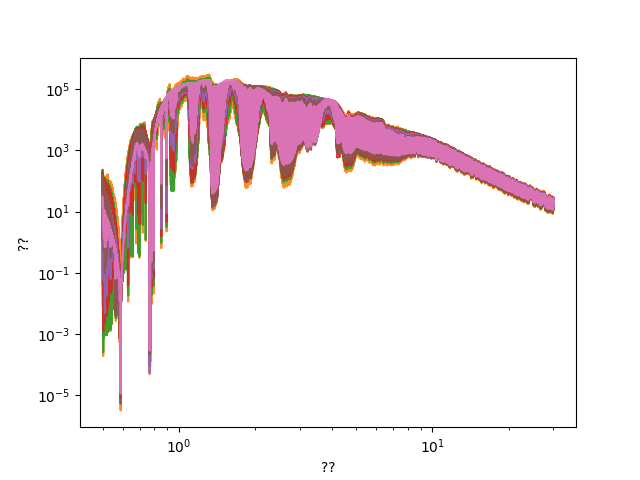

In [9]:
fig,ax = plt.subplots()

i = 2
for j in range(num_logg):

    teff = arr_teff[i]
    logg = arr_logg[j]
    wl = np.array(arr_wave)
    fl = np.array(flux_grid[:,i,j])

    ax.plot(wl,fl, label="%d"%teff, alpha=0.9)

ax.set(xscale="log", yscale="log")
ax.set(xlabel="??", ylabel="??")

plt.show()